In [41]:
# importing requred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and exploring dataset.

In [42]:
#loading dataset as a dataframe.
df = pd.read_csv('USA_Housing.csv')

In [43]:
#first 5 rows in the dataframe:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [44]:
#lets check how many rows and columns are there in the data-frame
df.shape

(5000, 7)

there are 5000 rows and 7 colums in our dataframe.

In [45]:
#check whether the datafram has null values 
print(df.isnull().sum().sum())

0


This implies that the data-frame has no null or empty values.

In [46]:
#lets check whether there are some duplicate entries in our data-frame.
print(df.duplicated().sum())

0


there are no duplicate rows.

In [47]:
#lets check the data-type of each field:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Every field except the Address field is a 'float64' which is floating number of 64 bits.

We may need the statistical descrilption like mean and standard deviation of some or all fields for feature scalling.

In [48]:
#lets see the statistical description of the df:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Find out the variables correlated to the price of the house.

In [49]:
#dropping the address variabel since will won't need it
df = df.drop('Address', axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [50]:
#lets find out the variables which are correlated with price of the house.
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

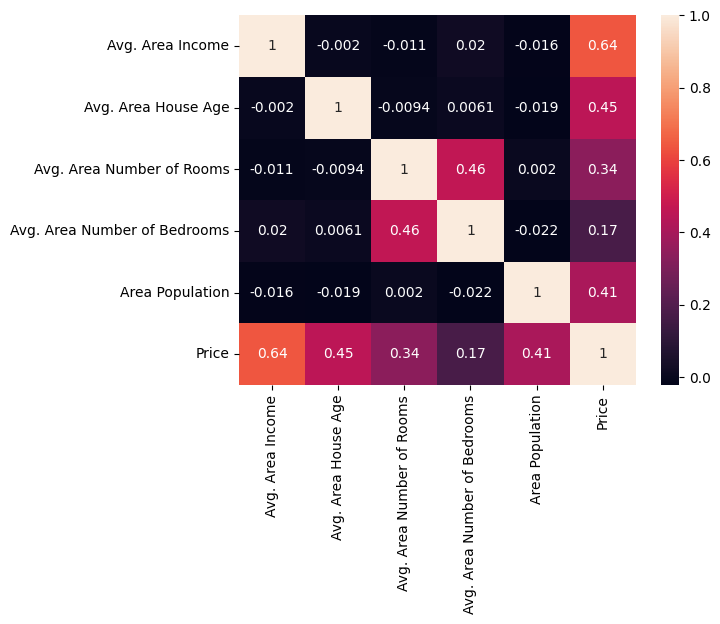

In [51]:
#lets visualize this using seaborn.
sns.heatmap(df.corr(), annot=True)

From the above heatmap, we can observe that the all the variables have CORRELATION COEFFICIENT > 0 with the PRICE of the house.


Let's map them on by one on the scatterplot.


PRICE vs AVG. AREA INCOME

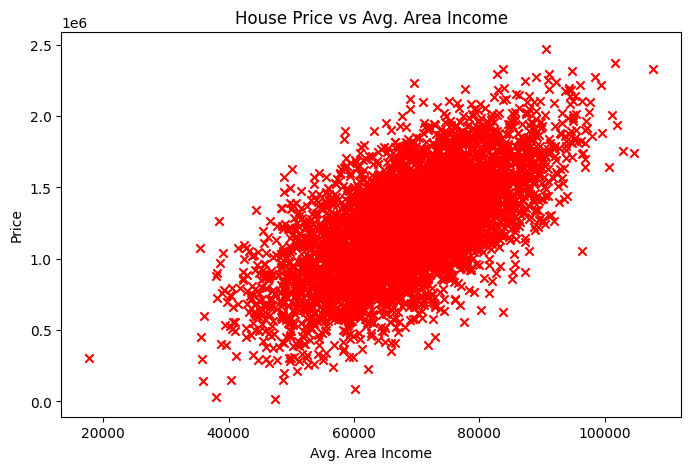

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(df["Avg. Area Income"], df["Price"], c='r', marker='x')
plt.title('House Price vs Avg. Area Income')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

Wow! there is visible strong positive correlation between these two variables.

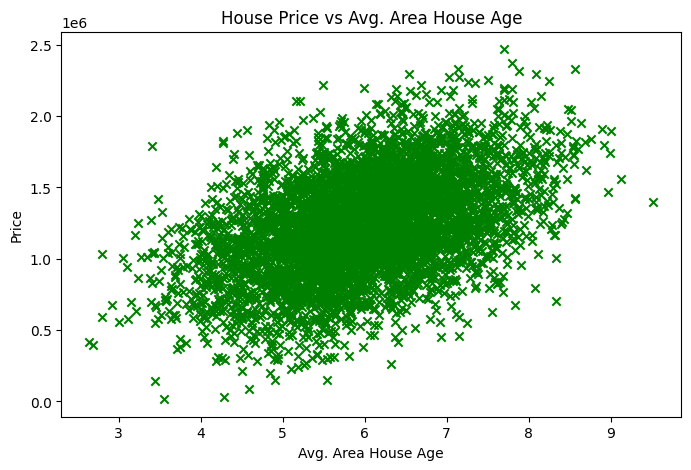

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Avg. Area House Age"], df["Price"], c='g', marker='x')
plt.title('House Price vs Avg. Area House Age')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.show()

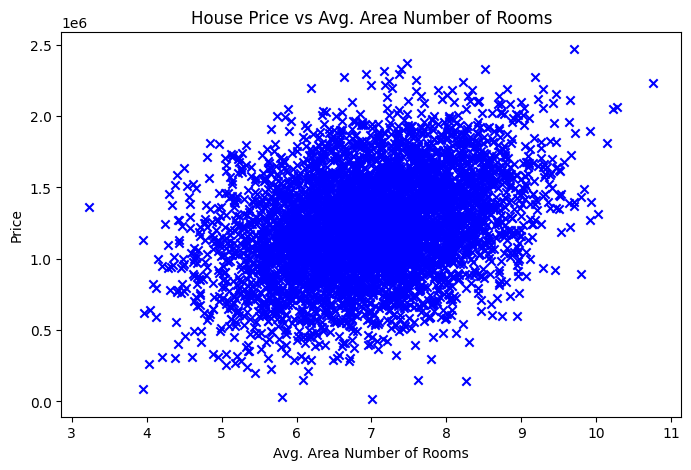

In [54]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Avg. Area Number of Rooms"], df["Price"], c='b', marker='x')
plt.title('House Price vs Avg. Area Number of Rooms')
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price')
plt.show()

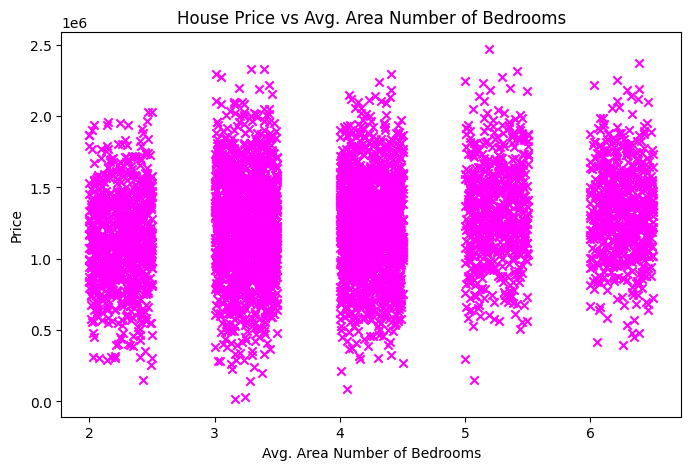

In [55]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Avg. Area Number of Bedrooms"], df["Price"], c='magenta', marker='x')
plt.title('House Price vs Avg. Area Number of Bedrooms')
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Price')
plt.show()

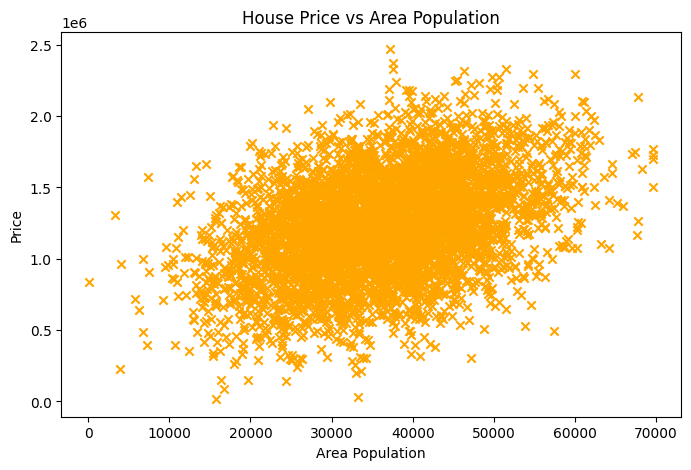

In [56]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Area Population"], df["Price"], c='orange', marker='x')
plt.title('House Price vs Area Population')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.show()

From the above scatterplots, we can conclude that all the variables except the Avg. Area Number of Bedrooms are correlated with the Price variable.

### Splitting the data-frame into two training dataset and testing dataset

In [57]:
df.shape

(5000, 6)

we have 5000 entries in our data set. Lets split these entries into Training data and Testing data

In [58]:
df_train = df.iloc[:4000] 
# first 4000 entries are the training data set

In [59]:
df_train.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
3995,50661.022296,5.793192,4.878601,4.28,44261.868043,8.291287e+05
3996,65142.756860,7.811442,6.702643,4.47,42574.655976,1.443228e+06
3997,53641.310287,4.509623,7.728758,5.40,36472.179051,6.160570e+05
3998,55716.539573,5.039490,5.615992,4.17,42051.295464,8.090575e+05
3999,68267.502820,5.907275,6.800001,4.10,35935.496873,1.383938e+06


In [60]:
df_test = df.iloc[4000:] # next 1000 entries are the testing dataset

In [61]:
df_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4000,83444.993691,5.310037,6.029292,2.43,44807.988357,1.514555e+06
4001,76609.917237,3.770548,6.700456,3.21,55430.311566,1.214689e+06
4002,78685.835027,7.020023,7.368314,5.14,34767.788424,1.672445e+06
4003,86232.599586,4.277773,8.916066,6.44,38437.362585,1.496777e+06
4004,75867.231110,6.588824,6.756786,3.11,32319.547497,1.408428e+06


# Building the model.

## Determining the hypothesis function $ f_w(x) $

We have obsereved that the Price of the house is correlated to 4 variables.

(1)Avg. Area Income ($x_1$)

(2)Avg. Area House Age ($ x_2 $)

(3)Avg. Area Number of Rooms ($ x_3 $)

(4)Area Population ($ x_4 $)


Therefore we will model our hypothesis function as: $$ f_w(x) = w_1.x_1+w_2.x_2+w_3.x_3+w_4.x_4+b $$ where $w_1,..,w_4$ are weights for each corresponding variable.


## Feature Selection and Feature Scalling:

Since we have determined that the Avg. Area Number of Bedrooms is not well correlated with the Price of the House, we can drop this feature from our training and testing dataset.

In [62]:
df_train = df_train.drop("Avg. Area Number of Bedrooms", axis=1)

In [63]:
df_test = df_test.drop("Avg. Area Number of Bedrooms", axis=1)

In [64]:
df_train.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06


In [65]:
df_test.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
4000,83444.993691,5.310037,6.029292,44807.988357,1.514555e+06


### Feature Scalling

Our features are very diverse in there range of values. Lets scale the features appropriately using Z-Score Scalling. 

In [66]:
# lets extract our training features and target variable in two different numpy matrices.
X_train = df_train[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Area Population"]].values 
# matrix of shape(4000,4)

In [67]:
print(X_train[0])

[7.95454586e+04 5.68286132e+00 7.00918814e+00 2.30868005e+04]


In [68]:
Y_train = df_train[["Price"]].values.reshape(-1, 1) # matrix of shape (4000,1)

In [69]:
print(Y_train)

[[1059033.55787012]
 [1505890.91484695]
 [1058987.98787608]
 ...
 [ 616056.96004191]
 [ 809057.4586059 ]
 [1383938.36679701]]


For feature scalling we need a function which take our X_train or Y_train as input and return a scaled matrix.

Since, we are using Z-score Scalling which will transform our features values into new feature values with O as the mean and 1 as the standard deviation. New feature value $x' = (x - mean)/std$ 

In [70]:
# function for feature scalling.
def scale(mat):
    """
    mat: Numpy matrix
    """
    mean = np.mean(mat, axis=0)
    std = np.std(mat, axis=0)
     # handling the case where the std=0 by replacing it with a very small number
    std[std==0] = 1e-8
    X_scaled = (mat-mean)/std
    return X_scaled, mean, std
    

In [90]:
X_train_scaled,X_mean, X_std = scale(X_train)

In [91]:
print(X_train_scaled)

[[ 1.02726644 -0.30244235  0.01984886 -1.33273546]
 [ 0.99950627  0.02065081 -0.25733584  0.39336789]
 [-0.68037704 -0.11766688  1.51700153  0.0609106 ]
 ...
 [-1.39545794 -1.4868791   0.73636183  0.01949323]
 [-1.20136901 -0.95195485 -1.36742917  0.58311131]
 [-0.02752131 -0.07588631 -0.18844946 -0.03472391]]


In [92]:
Y_train_scaled, Y_mean, Y_std  = scale(Y_train)

In [93]:
print(Y_train_scaled)

[[-0.49756404]
 [ 0.76347095]
 [-0.49769264]
 ...
 [-1.74764749]
 [-1.20299856]
 [ 0.4193199 ]]


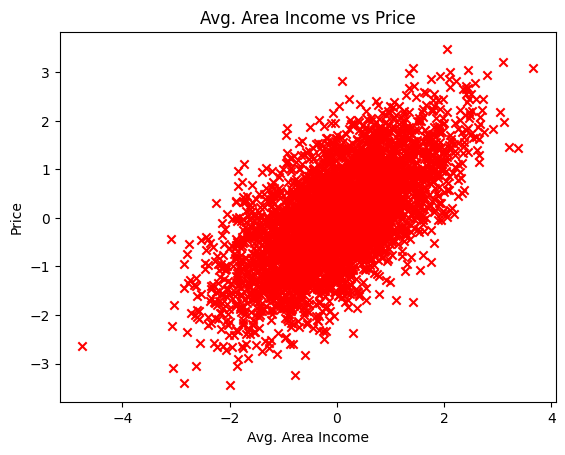

In [94]:
plt.scatter(X_train_scaled[:,0], Y_train_scaled, c='r', marker='x') #Avg. Area income vs Price
plt.title("Avg. Area Income vs Price")
plt.xlabel("Avg. Area Income")
plt.ylabel("Price")
plt.show()

The scatter plot after scalling and before scalling are similar, which means we have Scalled the feature correctly.

# Cost Function

The cost funtion is the mean square difference of the predicted target variable (Hypothesis function at $x_i$) and $y_i$

In [76]:
# funtion to find cost function 
def find_cost(x_train, y_train, w, b):
    """
    Args:
    x_train : matrix of shape (4000,4) # for our case
    y_train : matrix of shape (4000,2) # for our case
    w       : vactor of length 4       # for our case
    b       : scalar
    Returns:
    The average squared difference between prediction and actual target variable
    """
    m = x_train.shape[0] #number of rows
    f_wb = np.dot(x_train, w) + b  # out hypothesis function
    cost = np.sum(np.square(f_wb - y_train)) # sum of squared difference
    cost_avg = (1/2*m)*cost # avg. sum squared difference
    return cost_avg

We have to minimize this cost function in order to get the accrate values for weights and bias.

# Gradient Descent Algorithm

In [77]:
# finding gradient of cost function requerd to update w and b
def gradient(x_train,y_train,w,b):
    m = x.train.shape[0]
    f = np.dot(x_train,w) + b - y_train #error vector
    dj_dw = (1/m) * np.dot(f, x_train) # gradient WRT w
    dj_db = (1/m) * np.sum(f) # gradient WRT b
    return dj_dw, dj_db

Now we have a function to find the gradient of the cost function W.R.T both w and b.

## Function that performs gradien descent algorithm

In [78]:
# performing gradient descent algorithm
def gradient_descent(X, y, w_init, b_init, alpha, num_iterations, tolerance):
    """
    Performs gradient descent to find the optimal parameters (w, b).
    Args:
        X (numpy.ndarray): The feature matrix.
        y (numpy.ndarray): The target vector.
        w_init (numpy.ndarray): The initial weight vector.
        b_init (float): The initial bias term.
        alpha (float): The learning rate.
        num_iterations (int): The maximum number of iterations to run.
        tolerance (float): The change in cost function below which the algorithm is considered converged.
    Returns:
        tuple: A tuple containing the final w, b, and a list of the cost at each iteration.
    """
    m = X.shape[0]
    w = w_init
    b = b_init
    cost_history = []
    previous_cost = find_cost(X, y, w, b)
    cost_history.append(previous_cost)
    for i in range(num_iterations):
        # Calculate the error vector
        error_vector = np.dot(X, w) + b - y

        # Calculate the gradients
        dj_dw = (1 / m) * np.dot(X.T, error_vector)
        dj_db = (1 / m) * np.sum(error_vector)

        # Update parameters simultaneously
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Calculate the new cost
        current_cost = find_cost(X, y, w, b)
        cost_history.append(current_cost)

        # Check for convergence
        if abs(previous_cost - current_cost) < tolerance:
            print(f"Converged after {i+1} iterations.")
            break
            
        previous_cost = current_cost
        
    return w, b, cost_history


Now we have all the tools to Train our Model and find the most approproate values of weights and bias

## Training the model

We will initialize the values of $ w_1, w_2, w_3, w_4 $ and b all equal to zero.

From there we will update the values of all w's and b till we get the minimum value for the cost function. This will give us the appropiate values of w's and b. Then we can use those values of weights and biases to predict the prices of our testing dataset.

In [95]:
w = np.zeros(4).reshape(-1,1)
b = 0
alpha = 0.3
iterations  = 4000
tolerance = 0.001
training = gradient_descent(X_train_scaled, Y_train_scaled, w, b, alpha, iterations, tolerance)
print(training)

Converged after 33 iterations.
(array([[0.65351197],
       [0.4618128 ],
       [0.34508264],
       [0.4223499 ]]), np.float64(7.747136265834345e-16), [np.float64(8000000.0), np.float64(4312552.535034422), np.float64(2474885.477185026), np.float64(1558946.7889235523), np.float64(1102359.6386010414), np.float64(874725.2886935744), np.float64(761222.1519515067), np.float64(704619.991607156), np.float64(676389.8957437965), np.float64(662308.5219459424), np.float64(655283.783490546), np.float64(651778.9541087206), np.float64(650030.0969951835), np.float64(649157.343414371), np.float64(648721.7533558147), np.float64(648504.326875005), np.float64(648395.7857733405), np.float64(648341.5953573044), np.float64(648314.5373143057), np.float64(648301.0254557632), np.float64(648294.2774136142), np.float64(648290.9069964385), np.float64(648289.2234236322), np.float64(648288.3823738216), np.float64(648287.9621774338), np.float64(648287.7522240335), np.float64(648287.6473102045), np.float64(648287.5

After thoughtfully tuning the value of the learning rate 'alpha', it comes out that when alpha = 0.3, our cost function converrges to its minimu value in only 33 iterations. That implies that our choice of alpha is spot on. 

In [97]:
w_model = training[0] # (4,1) array of appropiate values of weights
b_model = training[1] # value of bias
print(f'Appropriate weights are: {w_model}')
print(f'Appropriate bias is: {b_model}')

Appropriate weights are: [[0.65351197]
 [0.4618128 ]
 [0.34508264]
 [0.4223499 ]]
Appropriate bias is: 7.747136265834345e-16


Here we get the values of weights and bias for our model.

### Plotting Cost vs No. of Iterations

Converged after 33 iterations.


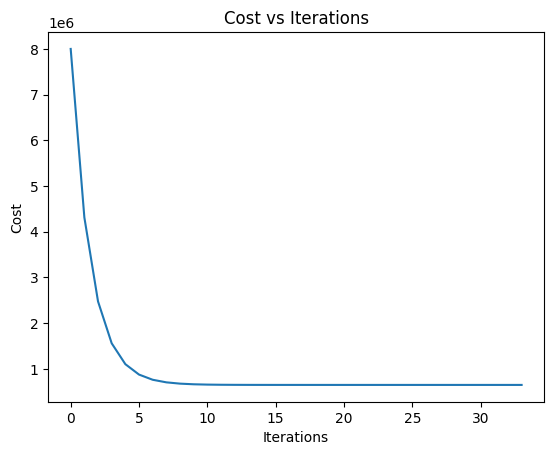

In [98]:
plt.plot(gradient_descent(X_train_scaled, Y_train_scaled, w, b, alpha, iterations, tolerance)[2], )
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Here, we can see that the value of cost decreases and converges to the minimun in 5 iterations.

# Testing the Model

After training our model now we have the appropriate values of weights and bias.

We will use this weights and bias to predict the Pice of the Houses from our testing data.

Remember we had sliced our Data into two parts, Treaining data and Testing data; before predicting the prices of the houses in the testing data, we have to do some procedures on the testing data that we had done previously on the training data.

The first thing that comes to mind is the "Feature Scaling". We will scale the features of the testing data using the Z-score scaling. 

In [99]:
# lets extract our test features and target variable in two different numpy matrices.
X_test = df_test[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Area Population"]].values 
# matrix of shape(4000,4)

In [100]:
print(X_test[0])

[8.34449937e+04 5.31003675e+00 6.02929154e+00 4.48079884e+04]


In [101]:
Y_test = df_test[["Price"]].values.reshape(-1, 1) # matrix of shape (4000,1)

In [103]:
print(Y_test[0:4])

[[1514555.08213084]
 [1214689.18370447]
 [1672445.34797165]
 [1496776.83013235]]


Now we have X_test and Y_test which are our testing data, though it is not scaled yet.

Let's scale our features.

In [111]:
# scaled testing features
X_test_scaled = (X_test - X_mean)/ X_std 

In [112]:
# scaled testing target variable
Y_test_scaled = (Y_test - Y_mean)/ Y_std

In [113]:
print(X_test_scaled)

[[ 1.39197633 -0.67882543 -0.95588542  0.8616002 ]
 [ 0.75271553 -2.23300845 -0.28757175  1.93469725]
 [ 0.94686886  1.04748198  0.37744932 -0.15268912]
 ...
 [-0.48363285  1.28025046 -2.17489587 -0.30438932]
 [-0.05241541 -0.45233239  0.14029079  0.64113121]
 [-0.28536649  0.00995518 -0.19608206  1.03266168]]


In [114]:
print(Y_test_scaled[0:4])

[[ 0.7879213 ]
 [-0.05830263]
 [ 1.23348887]
 [ 0.73775093]]
